In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib.gridspec as gridspec
from matplotlib.patches import FancyArrowPatch

import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import skewnorm
from scipy.special import erf
import matplotlib.cm as cm
import matplotlib

from scipy.signal import savgol_filter

from matplotlib.cm import ScalarMappable
import matplotlib
import matplotlib.colors as colors
import pickle


import os 
import sys

In [3]:

# Get the current working directory
current_dir = os.getcwd()

parent_dir = os.path.abspath(os.path.join(current_dir, ".."))

# Navigate to the sibling directory
sibling_dir = os.path.join(parent_dir, "00_analytical_function_setup")

# Add the sibling directory to sys.path for importing
if sibling_dir not in sys.path:
    sys.path.append(sibling_dir)

# Import the module from 00_analytical_function_setup
import analytical as a

## Load data

In [4]:

# Loading reference landscape data
with open('data/reference_landscape_reward.pkl', 'rb') as file:
    reference_landscape = pickle.load(file)

# Loading the saved output
with open('data/reference_threshold_vec.pkl', 'rb') as file:
    reference_threshold = pickle.load(file)


In [5]:

df_uniform_group_hist = pd.read_csv('data/Reward_Cumulative_20240607060823_group_hist.csv')
threshold_vec_group,corr_val,simresults_uniform_group_hist=a.df_to_simresults(df_uniform_group_hist,num_cols=1)

df_uniform_upward = pd.read_csv('data/Reward_Cumulative_20241019214552_group_hist_upward.csv')
threshold_vec_upward,corr_val,simresults_uniform_upward=a.df_to_simresults(df_uniform_upward,num_cols=1)




## Plotting

In [6]:

def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    new_cmap = colors.LinearSegmentedColormap.from_list(
        'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
        cmap(np.linspace(minval, maxval, n)))
    return new_cmap

In [7]:
# Custom black color
myblack = "#222222"
myaccent=myblack
mediumgrey='#abadaa'
lightgrey="#D3D3D3"
warmorange='#f5c72f'
softpurple="#a489f5"
# Set font globally
matplotlib.rcParams['font.family'] = 'Helvetica, Arial, sans-serif'
matplotlib.rcParams['font.sans-serif'] = 'Helvetica, Arial, sans-serif'  # Fallback to Arial if Helvetica is not available
dpi=300

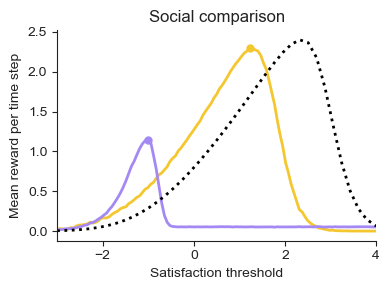

In [9]:

num_curves1 = simresults_uniform_group_hist.shape[1]
num_curves2 = simresults_uniform_upward.shape[1]

# Create a figure with two subplots side by side
fig = plt.figure(figsize=(4, 3),dpi=100)
# gs = gridspec.GridSpec(1, 2, width_ratios=[1, 1])


# Define colormap
cmap = truncate_colormap(plt.get_cmap('Greens_r'),0.,0.8)
norm = plt.Normalize(vmin=0, vmax=num_curves1-1)
sm = ScalarMappable(norm=norm, cmap=cmap)

# Define two colormaps
cmap_before = truncate_colormap(plt.get_cmap('Blues_r'),0,0.8)  # Colormap for curves before index 6
cmap_after =  truncate_colormap(plt.get_cmap('Reds'),0.2,1)     # Colormap for curves after index 6

# Normalization for each segment
norm_before = plt.Normalize(vmin=0, vmax=5)  # Assuming index 6 is exclusive
norm_after = plt.Normalize(vmin=0, vmax=num_curves2-7)  # Adjusting for the number of curves after index 6

# ScalarMappable instances for each segment
sm_before = ScalarMappable(norm=norm_before, cmap=cmap_before)
sm_after = ScalarMappable(norm=norm_after, cmap=cmap_after)

group_hist_optimum=np.zeros(num_curves1)
upward_optimum=np.zeros(num_curves1)
for j in range(num_curves1):
    group_hist_optimum[j] = threshold_vec_group[np.argmax(simresults_uniform_group_hist[:, j])]
    upward_optimum[j]=threshold_vec_upward[np.argmax(simresults_uniform_upward[:, j])]
    
# First subplot (wider)
ax1 = fig.add_subplot(1,1,1)  # Replacing ax0 with ax1 based on your request

color1 = warmorange
color2 = softpurple

# filtered_grp=savgol_filter(simresults_grp_skip0, window_length=5, polyorder=3)
# filtered_upward=savgol_filter(simresults_uniform_upward[:, 0], window_length=6, polyorder=4)
ax1.plot(threshold_vec_group, simresults_uniform_group_hist[:, 0], label=f"Series {0}", color=color1, linewidth=2)
ax1.scatter(group_hist_optimum[0], max(simresults_uniform_group_hist[:, 0]), color=color1, marker='o', s=25)  # Increased marker size
ax1.plot(threshold_vec_upward, simresults_uniform_upward[:, 0], label=f"Series {0}", color=color2, linewidth=2)
ax1.scatter(upward_optimum[0], max(simresults_uniform_upward[:, 0]), color=color2, marker='o', s=25)  # Increased marker size
ax1.plot(reference_threshold, reference_landscape, linestyle=':', color='k', linewidth=2)
ax1.set_xlabel('Satisfaction threshold', fontsize=10, color=myblack)
ax1.set_title('Social comparison', fontsize=12, color=myblack)
ax1.set_ylabel("Mean reward per time step", fontsize=10, color=myblack)
# ax1.grid(False, color=lightgrey)  # Added gridlines
ax1.tick_params(colors=myblack)
ax1.set_xlim(-3,4)
ax1.set_xticks([-2, 0, 2, 4])
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
for spine in ax1.spines.values():
    spine.set_color(myblack)


plt.tight_layout()
plt.savefig('output/figure_4.pdf', format='pdf', bbox_inches='tight')
plt.show()


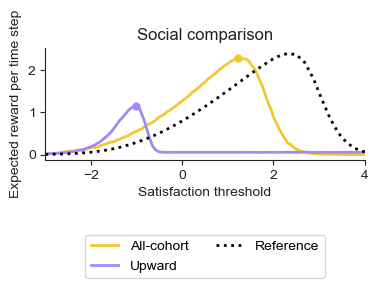

In [63]:
num_curves1 = simresults_uniform_group_hist.shape[1]
num_curves2 = simresults_uniform_upward.shape[1]

# Create a figure with two subplots side by side
fig = plt.figure(figsize=(4, 4), dpi=100)

# Define colormap
cmap = truncate_colormap(plt.get_cmap('Greens_r'), 0., 0.8)
norm = plt.Normalize(vmin=0, vmax=num_curves1-1)
sm = ScalarMappable(norm=norm, cmap=cmap)

# Define two colormaps
cmap_before = truncate_colormap(plt.get_cmap('Blues_r'), 0, 0.8)
cmap_after = truncate_colormap(plt.get_cmap('Reds'), 0.2, 1)

# Normalization for each segment
norm_before = plt.Normalize(vmin=0, vmax=5)
norm_after = plt.Normalize(vmin=0, vmax=num_curves2-7)

# ScalarMappable instances for each segment
sm_before = ScalarMappable(norm=norm_before, cmap=cmap_before)
sm_after = ScalarMappable(norm=norm_after, cmap=cmap_after)

group_hist_optimum = np.zeros(num_curves1)
upward_optimum = np.zeros(num_curves1)
for j in range(num_curves1):
    group_hist_optimum[j] = threshold_vec_group[np.argmax(simresults_uniform_group_hist[:, j])]
    upward_optimum[j] = threshold_vec_upward[np.argmax(simresults_uniform_upward[:, j])]

# First subplot
ax1 = fig.add_subplot(1, 1, 1)

color1 = warmorange
color2 = softpurple

# Plot lines with labels for legend - using unfiltered data
line1, = ax1.plot(threshold_vec_group, simresults_uniform_group_hist[:, 0], color=color1, linewidth=2, 
                  label='All-cohort')
ax1.scatter(group_hist_optimum[0], max(simresults_uniform_group_hist[:, 0]), 
            color=color1, marker='o', s=25)

line2, = ax1.plot(threshold_vec_upward, simresults_uniform_upward[:, 0], color=color2, 
                  linewidth=2, label='Upward')
ax1.scatter(upward_optimum[0], max(simresults_uniform_upward[:, 0]), 
            color=color2, marker='o', s=25)

line3, = ax1.plot(reference_threshold, reference_landscape, linestyle=':', 
                  color='k', linewidth=2, label='Reference')


# Updated legend formatting
ax1.legend(handles=[line1, line2, line3],
          frameon=True, 
          loc='upper center',
          bbox_to_anchor=(0.5, -0.61),
          ncol=2)

ax1.set_xlabel('Satisfaction threshold', fontsize=10, color=myblack)
ax1.set_title('Social comparison', fontsize=12, color=myblack)
ax1.set_ylabel("Expected reward per time step", fontsize=10, color=myblack)
ax1.tick_params(colors=myblack)
ax1.set_xlim(-3, 4)
ax1.set_xticks([-2, 0, 2, 4])
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
for spine in ax1.spines.values():
    spine.set_color(myblack)

plt.tight_layout()
plt.savefig('output/figure_4_with_legend.pdf', format='pdf', bbox_inches='tight')
plt.show()